# Import

In [1]:
import skimage
import numpy as np
from PIL import Image
import requests
import torch
from transformers import pipeline

# zeroshot object detection

https://huggingface.co/docs/transformers/main/tasks/zero_shot_object_detection

/home/csy/anaconda3/envs/temp_csy/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [23]:
from transformers import AutoProcessor, AutoModelForZeroShotObjectDetection, OwlViTForObjectDetection

In [4]:
from PIL import ImageDraw

In [5]:
checkpoint = "google/owlvit-base-patch32"
# detector = pipeline(model=checkpoint, task="zero-shot-object-detection")

In [14]:
url = "https://purrfectlove.net/wp-content/uploads/2015/06/catfamily.jpg"
image_target = Image.open(requests.get(url, stream=True).raw)

query_url =  "https://hips.hearstapps.com/hmg-prod/images/beautiful-smooth-haired-red-cat-lies-on-the-sofa-royalty-free-image-1678488026.jpg?crop=0.668xw:1.00xh;0.119xw,0&resize=1200:*"
query_image = Image.open(requests.get(query_url, stream=True).raw)

In [7]:
model = AutoModelForZeroShotObjectDetection.from_pretrained(checkpoint)
processor = AutoProcessor.from_pretrained(checkpoint)

In [8]:
inputs = processor(images=image_target, query_images=query_image, return_tensors="pt")

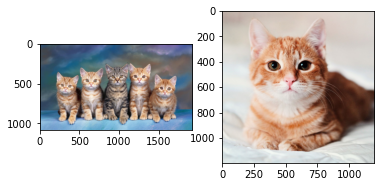

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2)
ax[0].imshow(image_target)
ax[1].imshow(query_image)

In [110]:
text_queries = ["cat"]

Detected similar object with confidence 1.0 at location [1096.79, 243.55, 1395.3, 982.55]
Detected similar object with confidence 0.973 at location [155.07, 352.33, 505.55, 1010.84]
Detected similar object with confidence 0.969 at location [784.87, 241.73, 1126.22, 1015.0]
Detected similar object with confidence 0.959 at location [491.3, 292.01, 808.72, 978.77]
Detected similar object with confidence 0.928 at location [1354.21, 385.72, 1749.25, 990.72]


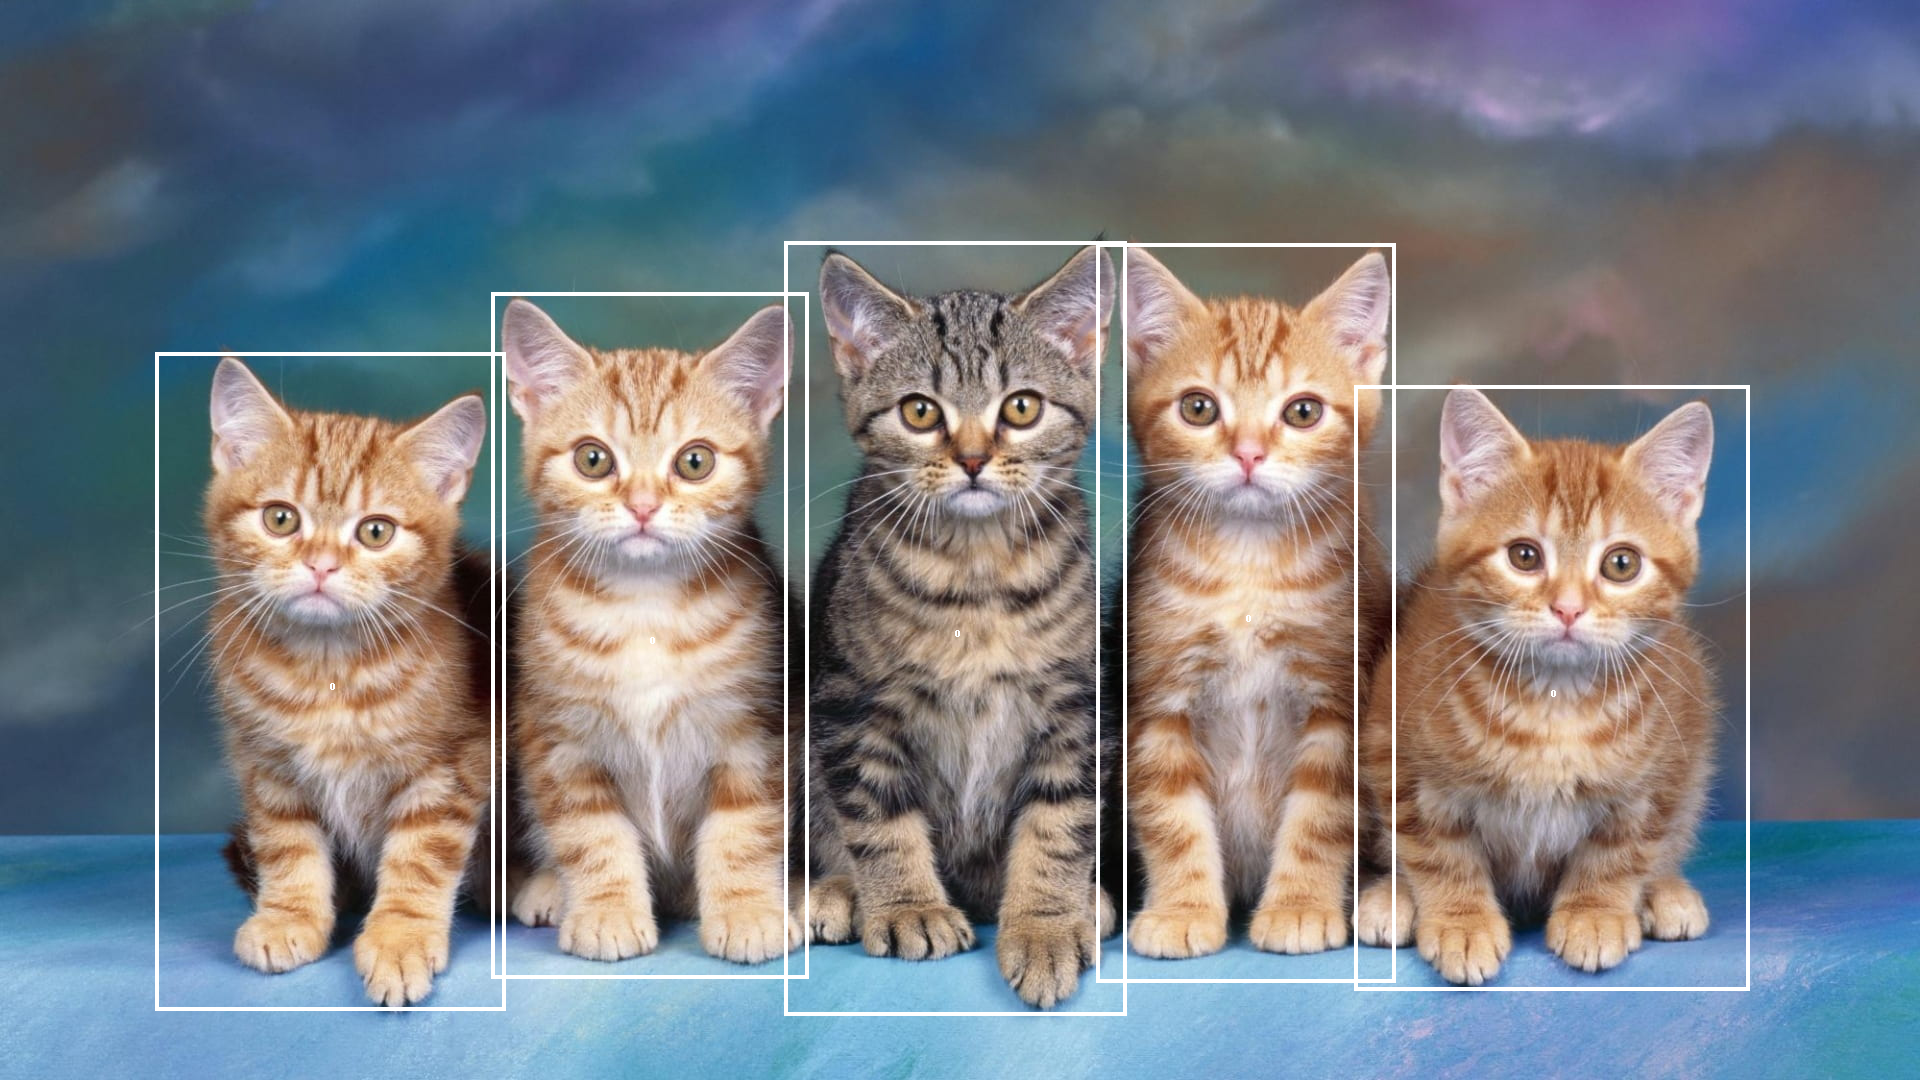

In [113]:
# import requests
# from PIL import Image
# import torch
# from transformers import AutoProcessor, OwlViTForObjectDetection

processor = AutoProcessor.from_pretrained("google/owlvit-base-patch16")
model = OwlViTForObjectDetection.from_pretrained("google/owlvit-base-patch16")
# url = "http://images.cocodataset.org/val2017/000000039769.jpg"
# image = Image.open(requests.get(url, stream=True).raw)
# query_url = "http://images.cocodataset.org/val2017/000000001675.jpg"
# query_image = Image.open(requests.get(query_url, stream=True).raw)
url = "https://purrfectlove.net/wp-content/uploads/2015/06/catfamily.jpg"
image = Image.open(requests.get(url, stream=True).raw)

query_url =  "https://hips.hearstapps.com/hmg-prod/images/beautiful-smooth-haired-red-cat-lies-on-the-sofa-royalty-free-image-1678488026.jpg?crop=0.668xw:1.00xh;0.119xw,0&resize=1200:*"
query_image = Image.open(requests.get(query_url, stream=True).raw)

inputs = processor(images=image, query_images=query_image, return_tensors="pt")
with torch.no_grad():
    outputs = model.image_guided_detection(**inputs)
# Target image sizes (height, width) to rescale box predictions [batch_size, 2]
target_sizes = torch.Tensor([image.size[::-1]])
# Convert outputs (bounding boxes and class logits) to COCO API
results = processor.post_process_image_guided_detection(
    outputs=outputs, threshold=0.6, nms_threshold=0.3, target_sizes=target_sizes
)
i = 0  # Retrieve predictions for the first image
draw = ImageDraw.Draw(image)
boxes, scores = results[i]["boxes"], results[i]["scores"]

for box, score in zip(boxes, scores):
    box = [round(i, 2) for i in box.tolist()]
    print(f"Detected similar object with confidence {round(score.item(), 3)} at location {box}")
    xmin, ymin, xmax, ymax = box
    draw.rectangle((xmin, ymin, xmax, ymax), outline="white", width=4)
    draw.text(((xmin+xmax)/2,(ymin+ymax)/2),text="0")
image

Detected similar object with confidence 1.0 at location [324.86, 32.75, 557.97, 400.45]


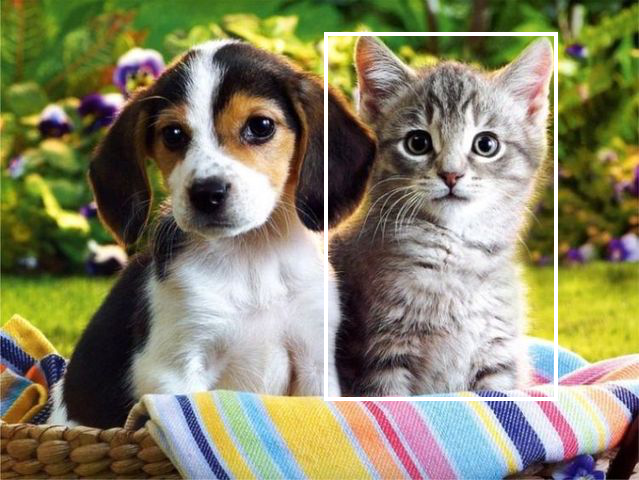

In [43]:
processor = AutoProcessor.from_pretrained("google/owlvit-base-patch16")
model = OwlViTForObjectDetection.from_pretrained("google/owlvit-base-patch16")
url = "https://www.padoniavets.com/sites/default/files/field/image/cats-and-dogs.jpg"
image = Image.open(requests.get(url, stream=True).raw)

query_url =  "https://hips.hearstapps.com/hmg-prod/images/beautiful-smooth-haired-red-cat-lies-on-the-sofa-royalty-free-image-1678488026.jpg?crop=0.668xw:1.00xh;0.119xw,0&resize=1200:*"
query_image = Image.open(requests.get(query_url, stream=True).raw)

inputs = processor(images=image, query_images=query_image, return_tensors="pt")
with torch.no_grad():
    outputs = model.image_guided_detection(**inputs)
# Target image sizes (height, width) to rescale box predictions [batch_size, 2]
target_sizes = torch.Tensor([image.size[::-1]])
# Convert outputs (bounding boxes and class logits) to COCO API
results = processor.post_process_image_guided_detection(
    outputs=outputs, threshold=0.6, nms_threshold=0.3, target_sizes=target_sizes
)
i = 0  # Retrieve predictions for the first image
draw = ImageDraw.Draw(image)
boxes, scores = results[i]["boxes"], results[i]["scores"]
for box, score in zip(boxes, scores):
    box = [round(i, 2) for i in box.tolist()]
    print(f"Detected similar object with confidence {round(score.item(), 3)} at location {box}")
    xmin, ymin, xmax, ymax = box
    draw.rectangle((xmin, ymin, xmax, ymax), outline="white", width=4)
image

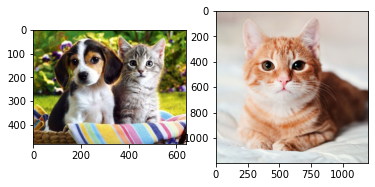

In [53]:
url = "https://www.padoniavets.com/sites/default/files/field/image/cats-and-dogs.jpg"
image = Image.open(requests.get(url, stream=True).raw)

query_url =  "https://hips.hearstapps.com/hmg-prod/images/beautiful-smooth-haired-red-cat-lies-on-the-sofa-royalty-free-image-1678488026.jpg?crop=0.668xw:1.00xh;0.119xw,0&resize=1200:*"
query_image = Image.open(requests.get(query_url, stream=True).raw)

fig, ax = plt.subplots(1, 2)
ax[0].imshow(image)
ax[1].imshow(query_image)

# To graph

In [2]:
from datasets import load_dataset

cppe5 = load_dataset("cppe-5")

In [3]:
import numpy as np
import os
from PIL import Image, ImageDraw

- 흐릿한 점을 주변의 명확한 사진(노드)로 추론해보는것, 소프트맥스로 나온 결과가 애매한 것들
- 노드로 인식하고 극중 상황을 추론하는 (싸움/긴장 등)

In [12]:
image = cppe5["train"][2]["image"]
annotations = cppe5["train"][9]["objects"]
draw = ImageDraw.Draw(image)

categories = cppe5["train"].features["objects"].feature["category"].names

id2label = {index: x for index, x in enumerate(categories, start=0)}
label2id = {v: k for k, v in id2label.items()}

# for i in range(len(annotations["id"])):
#     box = annotations["bbox"][i - 1]
#     class_idx = annotations["category"][i - 1]
#     x, y, w, h = tuple(box)
#     draw.rectangle((x, y, x + w, y + h), outline="red", width=1)
#     draw.text((x, y), id2label[class_idx], fill="white")

# image

edge_matrix = np.zeros((len(categories), len(categories)), dtype=int)

for i in range(len(annotations['category'])-1):
    edge_matrix[annotations['category'][i],annotations['category'][i+1]] = 1

edge_list = []

for i in range(edge_matrix.shape[0]):
    for j in range(edge_matrix.shape[1]):
        if edge_matrix[i, j] == 1:
            edge_list.append([i, j])

In [15]:
len(cppe5['train'])

1000

In [18]:
data_dict = {}
for z in range(len(cppe5['train'])) :
    image = cppe5["train"][z]["image"]
    annotations = cppe5["train"][z]["objects"]
    draw = ImageDraw.Draw(image)

    categories = cppe5["train"].features["objects"].feature["category"].names

    id2label = {index: x for index, x in enumerate(categories, start=0)}
    label2id = {v: k for k, v in id2label.items()}
    
    # for i in range(len(annotations["id"])):
    #     box = annotations["bbox"][i - 1]
    #     class_idx = annotations["category"][i - 1]
    #     x, y, w, h = tuple(box)
    #     draw.rectangle((x, y, x + w, y + h), outline="red", width=1)
    #     draw.text((x, y), id2label[class_idx], fill="white")

    edge_matrix = np.zeros((len(categories), len(categories)), dtype=int)

    for i in range(len(annotations['category'])-1):
        edge_matrix[annotations['category'][i],annotations['category'][i+1]] = 1

    edge_list = []

    for i in range(edge_matrix.shape[0]):
        for j in range(edge_matrix.shape[1]):
            if edge_matrix[i, j] == 1:
                edge_list.append([i, j])
                
    data_dict[z] = {
        "image": image,
        "annotations": annotations,
        "edge_matrix": edge_matrix,
        "edge_list": edge_list
    }

In [19]:
data_dict[0]

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=943x663>,
 'annotations': {'id': [114, 115, 116, 117],
  'area': [3796, 1596, 152768, 81002],
  'bbox': [[302.0, 109.0, 73.0, 52.0],
   [810.0, 100.0, 57.0, 28.0],
   [160.0, 31.0, 248.0, 616.0],
   [741.0, 68.0, 202.0, 401.0]],
  'category': [4, 4, 0, 0]},
 'edge_matrix': array([[1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1]]),
 'edge_list': [[0, 0], [4, 0], [4, 4]]}

In [20]:
data_dict[999]['edge_matrix']

array([[1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 1]])

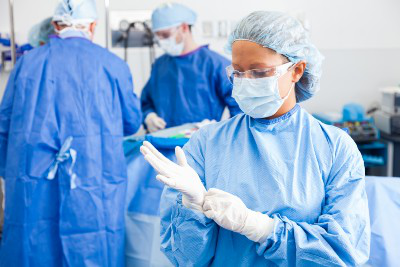

In [24]:
cppe5["train"][999]["image"]

In [21]:
total_edge_matrix = np.zeros((len(categories), len(categories)), dtype=int)

for z in range(1000):
    edge_matrix = data_dict[z]['edge_matrix']
    total_edge_matrix += edge_matrix

average_edge_matrix = total_edge_matrix / 1000

**weight matrix?**

In [22]:
average_edge_matrix

array([[0.188, 0.012, 0.03 , 0.014, 0.042],
       [0.078, 0.063, 0.076, 0.006, 0.13 ],
       [0.345, 0.033, 0.442, 0.043, 0.06 ],
       [0.049, 0.014, 0.091, 0.043, 0.089],
       [0.166, 0.142, 0.245, 0.174, 0.193]])